In [1]:
import math 
import pandas as pd
import numpy as np
from decimal import Decimal
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import adjusted_rand_score, adjusted_mutual_info_score
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
from pychop import chop
from kmeans import  StandardKMeans2, mpKMeans,  allowKMeans2, chop as kchop
from dist import *
import numpy as np


def load_data(file):
    data = pd.read_csv(file,sep="\\s+", header = None)
    return np.asarray(data.values).copy(order='C')

def sigificant_digit(number, digits=5):
    if number != 0:
        return round(number, digits - int(math.floor(math.log10(abs(number)))) - 1)
    else:
        return 0

import warnings
warnings.filterwarnings("ignore")

SSETS = ['s1.txt', 's2.txt', 's3.txt', 's4.txt']
SSETS_LABELS = ['s1-label.txt', 's2-label.txt', 's3-label.txt', 's4-label.txt']

Set 1


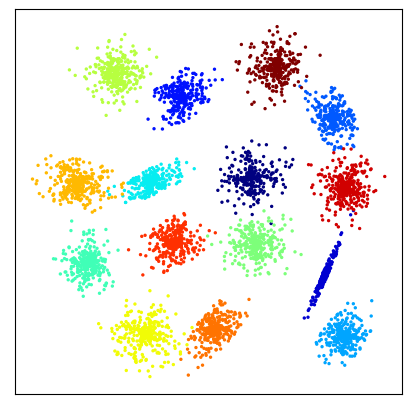

kmeans++ & kmeans++ (normalized) & mp1 k-means++ & mp1 k-means++ (normalized) & mp2 k-means++ &mp2 k-means++ (normalized) &
trigger: - - 66.921 \%;
(norm) trigger: - - 58.558 \%;
clusters: 15 15
SSE: 8.918E+12 & 1.546E+02 & 7.043E+14 & 1.546E+02 & 1.338E+13 & 1.546E+02
ARI: 0.98638 & 0.98594 & 0 & 0.98636 & 0.90607 & 0.98594
AMI: 0.9862 & 0.98569 & 0 & 0.98605 & 0.9591 & 0.98569
homogeneity: 0.98629 & 0.98578 & 0 & 0.98615 & 0.95158 & 0.98578
completeness: 0.98631 & 0.9858 & 1.0 & 0.98616 & 0.96735 & 0.9858
v_measure: 0.9863 & 0.98579 & 0 & 0.98616 & 0.9594 & 0.98579
Set 2


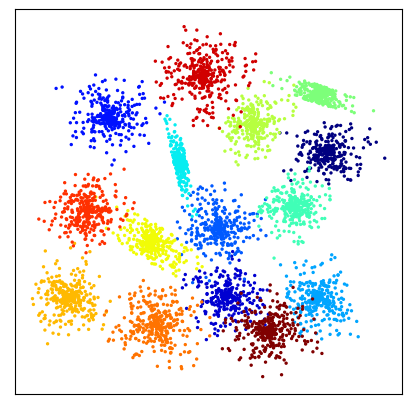

kmeans++ & kmeans++ (normalized) & mp1 k-means++ & mp1 k-means++ (normalized) & mp2 k-means++ &mp2 k-means++ (normalized) &
trigger: - - 64.369 \%;
(norm) trigger: - - 64.748 \%;
clusters: 15 15
SSE: 1.682E+13 & 3.292E+02 & 6.209E+14 & 3.281E+02 & 4.140E+13 & 3.279E+02
ARI: 0.85866 & 0.85563 & 0 & 0.853 & 0.66382 & 0.85159
AMI: 0.91541 & 0.90958 & 0 & 0.90965 & 0.84096 & 0.90866
homogeneity: 0.9094 & 0.90391 & 0 & 0.90405 & 0.81561 & 0.90313
completeness: 0.92275 & 0.91668 & 1.0 & 0.91666 & 0.87052 & 0.91563
v_measure: 0.91603 & 0.91025 & 0 & 0.91032 & 0.84217 & 0.90934
Set 3


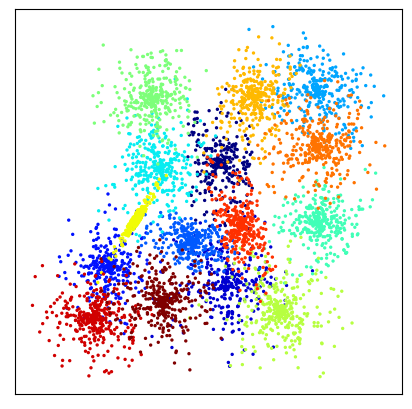

kmeans++ & kmeans++ (normalized) & mp1 k-means++ & mp1 k-means++ (normalized) & mp2 k-means++ &mp2 k-means++ (normalized) &
trigger: - - 66.121 \%;
(norm) trigger: - - 72.664 \%;
clusters: 15 15
SSE: 1.689E+13 & 4.776E+02 & 6.913E+14 & 4.823E+02 & 2.243E+13 & 4.321E+02
ARI: 0.72674 & 0.67958 & 0 & 0.6777 & 0.61198 & 0.72703
AMI: 0.79484 & 0.77736 & 0 & 0.77728 & 0.75388 & 0.79428
homogeneity: 0.79589 & 0.7746 & 0 & 0.77341 & 0.74453 & 0.79533
completeness: 0.7968 & 0.78344 & 1.0 & 0.78451 & 0.76723 & 0.79624
v_measure: 0.79634 & 0.779 & 0 & 0.77892 & 0.75571 & 0.79578
Set 4


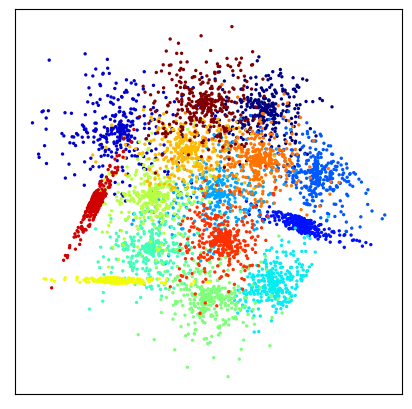

kmeans++ & kmeans++ (normalized) & mp1 k-means++ & mp1 k-means++ (normalized) & mp2 k-means++ &mp2 k-means++ (normalized) &
trigger: - - 56.314 \%;
(norm) trigger: - - 63.392 \%;
clusters: 15 15
SSE: 1.687E+13 & 5.721E+02 & 7.202E+14 & 5.881E+02 & 1.664E+13 & 5.880E+02
ARI: 0.59306 & 0.60922 & 0 & 0.59147 & 0.60141 & 0.59214
AMI: 0.70509 & 0.70838 & 0 & 0.70341 & 0.70681 & 0.70381
homogeneity: 0.70135 & 0.70837 & 0 & 0.70011 & 0.70442 & 0.70059
completeness: 0.71328 & 0.71267 & 1.0 & 0.71116 & 0.71357 & 0.71147
v_measure: 0.70726 & 0.71052 & 0 & 0.70559 & 0.70897 & 0.70599


In [2]:
LOW_PREC = kchop(np.float16)

for i in range(len(SSETS)):
    print('Set', i+1)
    X = load_data('data/S-sets/'+SSETS[i])
    y = load_data('data/S-sets/'+SSETS_LABELS[i]).flatten()
    
    fig = plt.figure(figsize=(5,5))
    plt.rcParams['axes.facecolor'] = 'white'
    plt.scatter(X[:, 0], X[:, 1], c=y, s=2, cmap='jet')
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.grid(True)
    plt.xticks([], [])
    plt.yticks([], [])
    plt.savefig('results/S'+str(i+1)+'.pdf', bbox_inches='tight')
    plt.show()
        
    mu = X.mean(axis=0)
    sigma = X.std(axis=0)
    norm_X = (X - mu) / sigma
    norm_X = np.float32(norm_X)
    X = np.float32(X)
    
    clusters = len(np.unique(y))
    kmeans = StandardKMeans2(n_clusters=clusters, seeding='d2')
    kmeans.fit(X)

    norm_kmeans = StandardKMeans2(n_clusters=clusters, seeding='d2')
    norm_kmeans.fit(norm_X)
    
    alkmeans = allowKMeans2(n_clusters=clusters, seeding='d2', low_prec=LOW_PREC, verbose=0)
    alkmeans.fit(X)
    
    norm_alkmeans = allowKMeans2(n_clusters=clusters, seeding='d2', low_prec=LOW_PREC, verbose=0)
    norm_alkmeans.fit(norm_X)
    
    mpkmeans = mpKMeans(n_clusters=clusters, seeding='d2', low_prec=LOW_PREC, verbose=0)
    mpkmeans.fit(X)
    
    norm_mpkmeans = mpKMeans(n_clusters=clusters, seeding='d2', low_prec=LOW_PREC, verbose=0)
    norm_mpkmeans.fit(norm_X)
    
    print("kmeans++ &", 
          "kmeans++ (normalized) &",
          'mp1 k-means++ &',
          'mp1 k-means++ (normalized) &',
          'mp2 k-means++ &'
          'mp2 k-means++ (normalized) &'
         )
    
    print("trigger:", '-', '-', sigificant_digit(mpkmeans.low_prec_trigger * 100),"\%;")
    print("(norm) trigger:", '-', '-', sigificant_digit(norm_mpkmeans.low_prec_trigger * 100),"\%;")
    print("clusters:", kmeans.centers.shape[0], mpkmeans.centers.shape[0])
    
    print('SSE:', '%.3E' % Decimal(kmeans.inertia[-1]), '&',
                  '%.3E' % Decimal(norm_kmeans.inertia[-1]), '&', 
                  '%.3E' % Decimal(alkmeans.inertia[-1]), '&',
                  '%.3E' % Decimal(norm_alkmeans.inertia[-1]),'&',
                  '%.3E' % Decimal(mpkmeans.inertia[-1]), '&',
                  '%.3E' % Decimal(norm_mpkmeans.inertia[-1])
         )
    
    
    print('ARI:',
      sigificant_digit(adjusted_rand_score(y, kmeans.labels)), '&',
      sigificant_digit(adjusted_rand_score(y, norm_kmeans.labels)),'&',
      sigificant_digit(adjusted_rand_score(y, alkmeans.labels)), '&',
      sigificant_digit(adjusted_rand_score(y, norm_alkmeans.labels)), '&',
      sigificant_digit(adjusted_rand_score(y, mpkmeans.labels)), '&',
      sigificant_digit(adjusted_rand_score(y, norm_mpkmeans.labels))
     )
        
        
    print('AMI:',
      sigificant_digit(adjusted_mutual_info_score(y, kmeans.labels)), '&',
      sigificant_digit(adjusted_mutual_info_score(y, norm_kmeans.labels)),'&',
      sigificant_digit(adjusted_mutual_info_score(y, alkmeans.labels)), '&',
      sigificant_digit(adjusted_mutual_info_score(y, norm_alkmeans.labels)), '&',
      sigificant_digit(adjusted_mutual_info_score(y, mpkmeans.labels)), '&',
      sigificant_digit(adjusted_mutual_info_score(y, norm_mpkmeans.labels))
     )
    
    
    print('homogeneity:',
          sigificant_digit(homogeneity_score(y, kmeans.labels)), '&',
          sigificant_digit(homogeneity_score(y, norm_kmeans.labels)),'&',
          sigificant_digit(homogeneity_score(y, alkmeans.labels)), '&',
          sigificant_digit(homogeneity_score(y, norm_alkmeans.labels)), '&',
          sigificant_digit(homogeneity_score(y, mpkmeans.labels)), '&',
          sigificant_digit(homogeneity_score(y, norm_mpkmeans.labels))
         )

    print('completeness:', sigificant_digit(completeness_score(y, kmeans.labels)),'&',
                          sigificant_digit(completeness_score(y, norm_kmeans.labels)),'&',
                          sigificant_digit(completeness_score(y, alkmeans.labels)),'&',
                          sigificant_digit(completeness_score(y, norm_alkmeans.labels)),'&',
                          sigificant_digit(completeness_score(y, mpkmeans.labels)), '&',
                          sigificant_digit(completeness_score(y, norm_mpkmeans.labels)),
         )

    print('v_measure:', sigificant_digit(v_measure_score(y, kmeans.labels)), '&',
                        sigificant_digit(v_measure_score(y, norm_kmeans.labels)),'&',
                        sigificant_digit(v_measure_score(y, alkmeans.labels)), '&',
                        sigificant_digit(v_measure_score(y, norm_alkmeans.labels)),'&',
                        sigificant_digit(v_measure_score(y, mpkmeans.labels)), '&',
                        sigificant_digit(v_measure_score(y, norm_mpkmeans.labels))
         )

Set 1


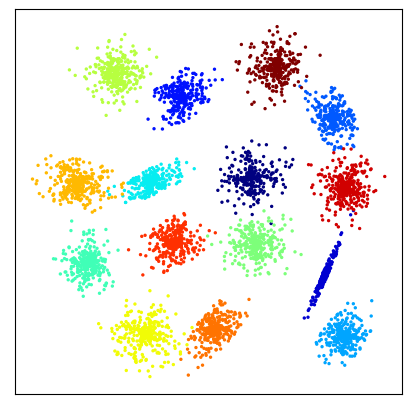

kmeans++ & kmeans++ (normalized) & mp1 k-means++ & mp1 k-means++ (normalized) & mp2 k-means++ &mp2 k-means++ (normalized) &
trigger: - - 66.921 \%;
(norm) trigger: - - 55.968 \%;
clusters: 15 15
SSE: 8.918E+12 & 1.546E+02 & 7.043E+14 & 6.884E+02 & 1.338E+13 & 2.417E+02
ARI: 0.98638 & 0.98594 & 0 & 0.65534 & 0.90607 & 0.90047
AMI: 0.9862 & 0.98569 & 0 & 0.82701 & 0.9591 & 0.94997
homogeneity: 0.98629 & 0.98578 & 0 & 0.79744 & 0.95158 & 0.94293
completeness: 0.98631 & 0.9858 & 1.0 & 0.86173 & 0.96735 & 0.95786
v_measure: 0.9863 & 0.98579 & 0 & 0.82834 & 0.9594 & 0.95033
Set 2


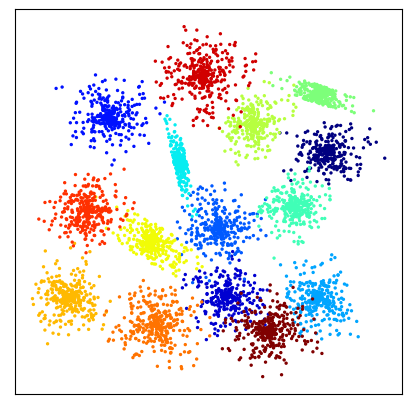

kmeans++ & kmeans++ (normalized) & mp1 k-means++ & mp1 k-means++ (normalized) & mp2 k-means++ &mp2 k-means++ (normalized) &
trigger: - - 64.369 \%;
(norm) trigger: - - 66.063 \%;
clusters: 15 15
SSE: 1.682E+13 & 3.292E+02 & 6.209E+14 & 7.528E+02 & 4.140E+13 & 3.435E+02
ARI: 0.85866 & 0.85563 & 0 & 0.58305 & 0.66382 & 0.83331
AMI: 0.91541 & 0.90958 & 0 & 0.7791 & 0.84096 & 0.90169
homogeneity: 0.9094 & 0.90391 & 0 & 0.75654 & 0.81561 & 0.89371
completeness: 0.92275 & 0.91668 & 1.0 & 0.80662 & 0.87052 & 0.91129
v_measure: 0.91603 & 0.91025 & 0 & 0.78078 & 0.84217 & 0.90242
Set 3


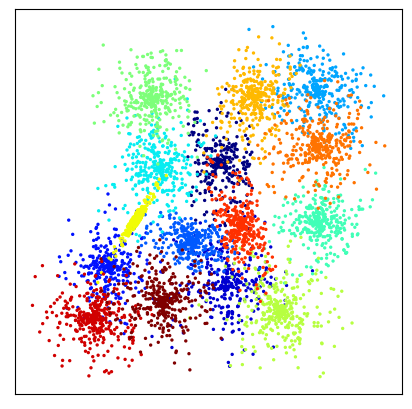

kmeans++ & kmeans++ (normalized) & mp1 k-means++ & mp1 k-means++ (normalized) & mp2 k-means++ &mp2 k-means++ (normalized) &
trigger: - - 66.121 \%;
(norm) trigger: - - 71.582 \%;
clusters: 15 15
SSE: 1.689E+13 & 4.776E+02 & 6.913E+14 & 9.055E+02 & 2.243E+13 & 5.207E+02
ARI: 0.72674 & 0.67958 & 0 & 0.48497 & 0.61198 & 0.6304
AMI: 0.79484 & 0.77736 & 0 & 0.69125 & 0.75388 & 0.75625
homogeneity: 0.79589 & 0.7746 & 0 & 0.667 & 0.74453 & 0.7528
completeness: 0.7968 & 0.78344 & 1.0 & 0.72246 & 0.76723 & 0.76336
v_measure: 0.79634 & 0.779 & 0 & 0.69362 & 0.75571 & 0.75805
Set 4


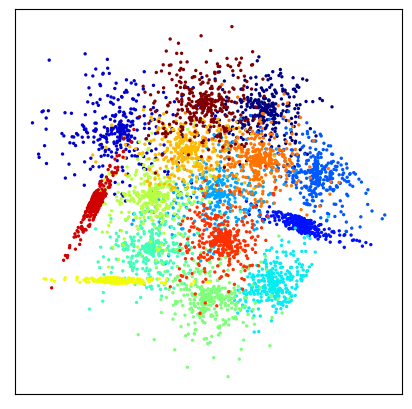

kmeans++ & kmeans++ (normalized) & mp1 k-means++ & mp1 k-means++ (normalized) & mp2 k-means++ &mp2 k-means++ (normalized) &
trigger: - - 56.314 \%;
(norm) trigger: - - 64.413 \%;
clusters: 15 15
SSE: 1.687E+13 & 5.721E+02 & 7.202E+14 & 1.120E+03 & 1.664E+13 & 5.978E+02
ARI: 0.59306 & 0.60922 & 0 & 0.43707 & 0.60141 & 0.58856
AMI: 0.70509 & 0.70838 & 0 & 0.62131 & 0.70681 & 0.69904
homogeneity: 0.70135 & 0.70837 & 0 & 0.60347 & 0.70442 & 0.6971
completeness: 0.71328 & 0.71267 & 1.0 & 0.64592 & 0.71357 & 0.70545
v_measure: 0.70726 & 0.71052 & 0 & 0.62397 & 0.70897 & 0.70125


In [3]:
LOW_PREC = chop(prec='q52', rmode=1)

for i in range(len(SSETS)):
    print('Set', i+1)
    X = load_data('data/S-sets/'+SSETS[i])
    y = load_data('data/S-sets/'+SSETS_LABELS[i]).flatten()
    
    fig = plt.figure(figsize=(5,5))
    plt.rcParams['axes.facecolor'] = 'white'
    plt.scatter(X[:, 0], X[:, 1], c=y, s=2, cmap='jet')
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.grid(True)
    plt.xticks([], [])
    plt.yticks([], [])
    plt.savefig('results/S'+str(i+1)+'.pdf', bbox_inches='tight')
    plt.show()
        
    mu = X.mean(axis=0)
    sigma = X.std(axis=0)
    norm_X = (X - mu) / sigma
    norm_X = np.float32(norm_X)
    X = np.float32(X)
    
    clusters = len(np.unique(y))
    kmeans = StandardKMeans2(n_clusters=clusters, seeding='d2')
    kmeans.fit(X)

    norm_kmeans = StandardKMeans2(n_clusters=clusters, seeding='d2')
    norm_kmeans.fit(norm_X)
    
    alkmeans = allowKMeans2(n_clusters=clusters, seeding='d2', low_prec=LOW_PREC, verbose=0)
    alkmeans.fit(X)
    
    norm_alkmeans = allowKMeans2(n_clusters=clusters, seeding='d2', low_prec=LOW_PREC, verbose=0)
    norm_alkmeans.fit(norm_X)
    
    mpkmeans = mpKMeans(n_clusters=clusters, seeding='d2', low_prec=LOW_PREC, verbose=0)
    mpkmeans.fit(X)
    
    norm_mpkmeans = mpKMeans(n_clusters=clusters, seeding='d2', low_prec=LOW_PREC, verbose=0)
    norm_mpkmeans.fit(norm_X)
    
    print("kmeans++ &", 
          "kmeans++ (normalized) &",
          'mp1 k-means++ &',
          'mp1 k-means++ (normalized) &',
          'mp2 k-means++ &'
          'mp2 k-means++ (normalized) &'
         )
    
    print("trigger:", '-', '-', sigificant_digit(mpkmeans.low_prec_trigger * 100),"\%;")
    print("(norm) trigger:", '-', '-', sigificant_digit(norm_mpkmeans.low_prec_trigger * 100),"\%;")
    print("clusters:", kmeans.centers.shape[0], mpkmeans.centers.shape[0])
    
    print('SSE:', '%.3E' % Decimal(kmeans.inertia[-1]), '&',
                  '%.3E' % Decimal(norm_kmeans.inertia[-1]), '&', 
                  '%.3E' % Decimal(alkmeans.inertia[-1]), '&',
                  '%.3E' % Decimal(norm_alkmeans.inertia[-1]),'&',
                  '%.3E' % Decimal(mpkmeans.inertia[-1]), '&',
                  '%.3E' % Decimal(norm_mpkmeans.inertia[-1])
         )
    
    
    print('ARI:',
      sigificant_digit(adjusted_rand_score(y, kmeans.labels)), '&',
      sigificant_digit(adjusted_rand_score(y, norm_kmeans.labels)),'&',
      sigificant_digit(adjusted_rand_score(y, alkmeans.labels)), '&',
      sigificant_digit(adjusted_rand_score(y, norm_alkmeans.labels)), '&',
      sigificant_digit(adjusted_rand_score(y, mpkmeans.labels)), '&',
      sigificant_digit(adjusted_rand_score(y, norm_mpkmeans.labels))
     )
        
        
    print('AMI:',
      sigificant_digit(adjusted_mutual_info_score(y, kmeans.labels)), '&',
      sigificant_digit(adjusted_mutual_info_score(y, norm_kmeans.labels)),'&',
      sigificant_digit(adjusted_mutual_info_score(y, alkmeans.labels)), '&',
      sigificant_digit(adjusted_mutual_info_score(y, norm_alkmeans.labels)), '&',
      sigificant_digit(adjusted_mutual_info_score(y, mpkmeans.labels)), '&',
      sigificant_digit(adjusted_mutual_info_score(y, norm_mpkmeans.labels))
     )
    
    
    print('homogeneity:',
          sigificant_digit(homogeneity_score(y, kmeans.labels)), '&',
          sigificant_digit(homogeneity_score(y, norm_kmeans.labels)),'&',
          sigificant_digit(homogeneity_score(y, alkmeans.labels)), '&',
          sigificant_digit(homogeneity_score(y, norm_alkmeans.labels)), '&',
          sigificant_digit(homogeneity_score(y, mpkmeans.labels)), '&',
          sigificant_digit(homogeneity_score(y, norm_mpkmeans.labels))
         )

    print('completeness:', sigificant_digit(completeness_score(y, kmeans.labels)),'&',
                          sigificant_digit(completeness_score(y, norm_kmeans.labels)),'&',
                          sigificant_digit(completeness_score(y, alkmeans.labels)),'&',
                          sigificant_digit(completeness_score(y, norm_alkmeans.labels)),'&',
                          sigificant_digit(completeness_score(y, mpkmeans.labels)), '&',
                          sigificant_digit(completeness_score(y, norm_mpkmeans.labels)),
         )

    print('v_measure:', sigificant_digit(v_measure_score(y, kmeans.labels)), '&',
                        sigificant_digit(v_measure_score(y, norm_kmeans.labels)),'&',
                        sigificant_digit(v_measure_score(y, alkmeans.labels)), '&',
                        sigificant_digit(v_measure_score(y, norm_alkmeans.labels)),'&',
                        sigificant_digit(v_measure_score(y, mpkmeans.labels)), '&',
                        sigificant_digit(v_measure_score(y, norm_mpkmeans.labels))
         )